In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1d4MORCKkRCGduPVW98azAr8IOQs_2RpA'
df_clean = pd.read_csv(url, encoding='Latin-1')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   normalized-losses  203 non-null    int64  
 2   make               203 non-null    object 
 3   fuel-type          203 non-null    object 
 4   aspiration         203 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         203 non-null    object 
 7   drive-wheels       203 non-null    object 
 8   engine-location    203 non-null    object 
 9   wheel-base         203 non-null    float64
 10  length             203 non-null    float64
 11  width              203 non-null    float64
 12  height             203 non-null    float64
 13  curb-weight        203 non-null    int64  
 14  engine-type        203 non-null    object 
 15  num-of-cylinders   203 non-null    object 
 16  engine-size        203 non

In [ ]:
df_wheel = df_clean[['drive-wheels', 'body-style', 'price']]
wheel_group = df_wheel.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
wheel_group

,drive-wheels,body-style,price
0,4wd,hatchback,10405.064675
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9940.186522
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [ ]:
df_pivot = wheel_group.pivot(index='drive-wheels', columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN  10405.064675  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9940.186522   
rwd              23949.6  24202.714286  14278.269966  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

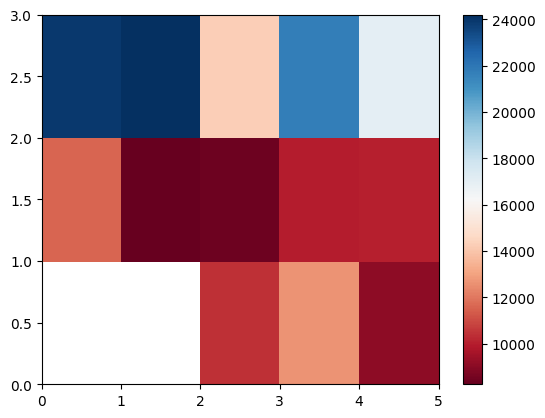

In [ ]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

In [ ]:
merk = df_clean[['make', 'price']]
merk_grp = merk.groupby('make').mean()
#merk_grp.sort_values(['price'], ascending=False)
merk_grp.info()


<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, alfa-romero to volvo
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   22 non-null     float64
dtypes: float64(1)
memory usage: 352.0+ bytes


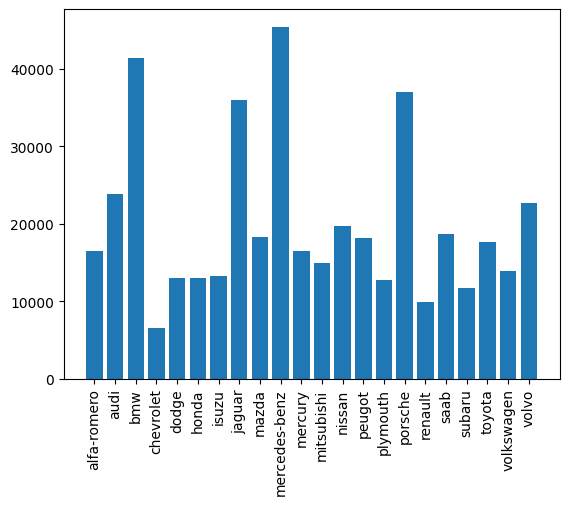

In [ ]:
plt.bar(merk['make'], merk['price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df_clean[['price', 'engine-size']].corr()

,price,engine-size
price,1.000000,0.861545
engine-size,0.861545,1.000000


<Axes: xlabel='price', ylabel='engine-size'>

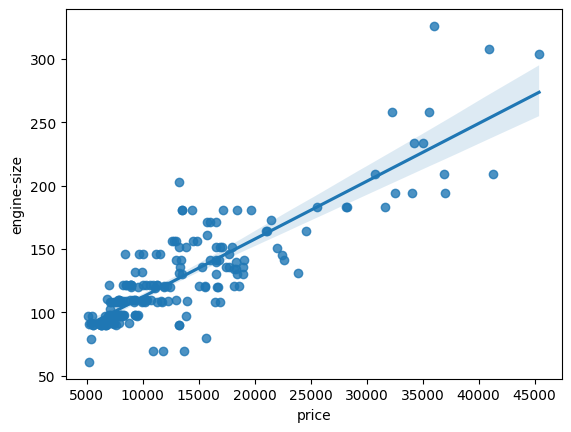

In [ ]:
sns.regplot(x='price', y='engine-size', data = df_clean)
